# Precision Recall Tradeoff



|$~$ | Predicted Cat | Predicted Dog |
| ----- |  ------ | ------- |
|Actual Cat | 5 | 2 |
|Actual Dog | 3 | 3 |


**ACCURACY**:
$${\displaystyle \mathrm {ACC} ={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {P} +\mathrm {N} }}={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {TP} +\mathrm {TN} +\mathrm {FP} +\mathrm {FN} }}}$$

**RECALL**:
$$
{\displaystyle \mathrm {TPR} ={\frac {\mathrm {TP} }{\mathrm {P} }}={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN} }}=1-\mathrm {FNR} } $$

**PRECISION**:  

$$
{\displaystyle \mathrm {PPV} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FP} }}=1-\mathrm {FDR} } $$

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve

In [72]:
digit = load_digits()

In [73]:
X = digit.data
y = digit.target == 9

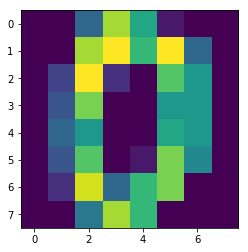

In [74]:
plt.imshow(X[0].reshape(8,8))

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9755555555555555

In [77]:
from sklearn.dummy import DummyClassifier

In [78]:
dum = DummyClassifier(strategy='most_frequent')
dum.fit(X_train, y_train)
dum.score(X_test, y_test)

0.8955555555555555

In [79]:
lr_pred = clf.predict(X_test)
dum_pred = dum.predict(X_test)

In [80]:
from sklearn.metrics import confusion_matrix

In [81]:
print(confusion_matrix(lr_pred, y_test))

[[399   7]
 [  4  40]]


In [82]:
from sklearn.datasets import load_breast_cancer

In [83]:
cancer = load_breast_cancer()

In [84]:
X = cancer.data
y = cancer.target

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [86]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [87]:
pred = clf.predict(X_test)
confusion_matrix(pred, y_test)

array([[52,  5],
       [ 1, 85]])

In [88]:
from sklearn.metrics import classification_report

In [89]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        53
           1       0.99      0.94      0.97        90

   micro avg       0.96      0.96      0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



### Changing the Threshold

In [53]:
lowered_thresh = clf.decision_function(X_test) > -1.0

In [54]:
print(classification_report(y_test,  lowered_thresh))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.98      0.98      0.98        90

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [55]:
from sklearn.metrics import precision_recall_curve

In [56]:
precision, recall, thresholds = precision_recall_curve(y_test, clf.decision_function(X_test))

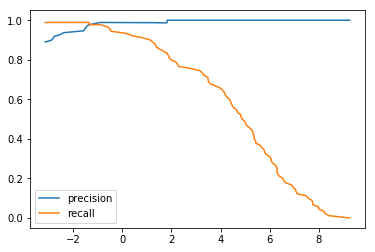

In [57]:
plt.plot(thresholds, precision[1:],  label = 'precision')
plt.plot(thresholds, recall[1:], label = 'recall')
plt.legend()

              precision    recall  f1-score   support

           0       0.98      0.91      0.95        57
           1       0.94      0.99      0.97        86

   micro avg       0.96      0.96      0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



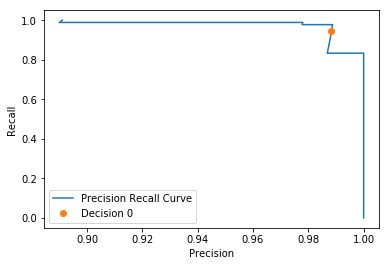

In [58]:
smallest = np.argmin(np.abs(thresholds))
plt.plot(precision, recall, label = 'Precision Recall Curve')
plt.plot(precision[smallest], recall[smallest], 'o', label = 'Decision 0')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend();
print(classification_report(pred, y_test))

### ROC Curve

In [59]:
fpr, tpr, thresholds = roc_curve(y_test, clf.decision_function(X_test))

Text(0, 0.5, 'True Positive Rate')

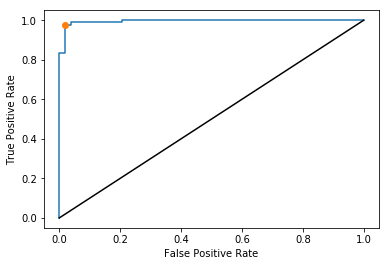

In [60]:
smallest = np.argmin(np.abs(thresholds))
plt.plot(fpr, tpr)
plt.plot(fpr[smallest], tpr[smallest], 'o')
plt.plot(fpr, fpr, c = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [61]:
from sklearn.metrics import roc_auc_score

In [62]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.9945492662473795

### Using Metrics in Model Selection

In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
cross_val_score(clf, X_train, y_train, scoring = 'accuracy')

array([0.95774648, 0.92253521, 0.95774648])

In [65]:
cross_val_score(clf, X_train, y_train, scoring = 'precision')

array([0.95604396, 0.92391304, 0.94623656])

In [66]:
cross_val_score(clf, X_train, y_train, scoring = 'recall')

array([0.97752809, 0.95505618, 0.98876404])

In [67]:
cross_val_score(clf, X_train, y_train, scoring = 'roc_auc')

array([0.99342803, 0.98325207, 0.99258003])

In [68]:
params = {'C': [0.1, 1.0, 5, 10, 50, 100, 400, 1000]}
grid = GridSearchCV(clf, param_grid=params, scoring = 'roc_auc')

In [69]:
grid.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1.0, 5, 10, 50, 100, 400, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [70]:
grid.best_params_

{'C': 5}